In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Dataset (5 records)
X = np.array([1., 2., 3., 4., 5.])
y = np.array([0., 0., 0., 1., 1.])
m = len(y)

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [ ]:
# Initial params
b0 = 0.0
b1 = 0.0
alpha = 0.1

# Initial z and h
z = b0 + b1 * X
h = sigmoid(z)
eps = 1e-15
initial_cost = -(1.0 / m) * np.sum(y * np.log(h + eps) + (1 - y)
                                    * np.log(1 - h + eps))
print("Initial h:", h)
print("Initial cost:", initial_cost)



Initial h: [0.5 0.5 0.5 0.5 0.5]
Initial cost: 0.6931471805599433


In [ ]:
# Gradients at initial params
h_minus_y = h - y
grad_b0 = np.mean(h_minus_y)
grad_b1 = np.mean(h_minus_y * X)
print("grad_b0 =", grad_b0)
print("grad_b1 =", grad_b1)



grad_b0 = 0.1
grad_b1 = -0.3


In [ ]:
# One gradient descent update
b0_new = b0 - alpha * grad_b0
b1_new = b1 - alpha * grad_b1
print("After one update: b0 =", b0_new, ", b1 =", b1_new)

# Run gradient descent
b0, b1 = 0.0, 0.0
n_iter = 2000
history = []

for it in range(n_iter):
    z = b0 + b1 * X
    h = sigmoid(z)

    grad_b0 = np.mean(h - y)
    grad_b1 = np.mean((h - y) * X)
    cost = -(1.0 / m) * np.sum(y * np.log(h + eps) + (1 - y)
                                * np.log(1 - h + eps))

    history.append((it, b0, b1, cost))

    b0 = b0 - alpha * grad_b0
    b1 = b1 - alpha * grad_b1

print("\nFinal parameters after {} iterations:".format(n_iter))
print("b0 =", b0)
print("b1 =", b1)



After one update: b0 = -0.010000000000000002 , b1 = 0.03

Final parameters after 2000 iterations:
b0 = -8.124229652999901
b1 = 2.379077884857112


Decision boundary x = 3.4148649376764073
Final cost = 0.1197651327339016


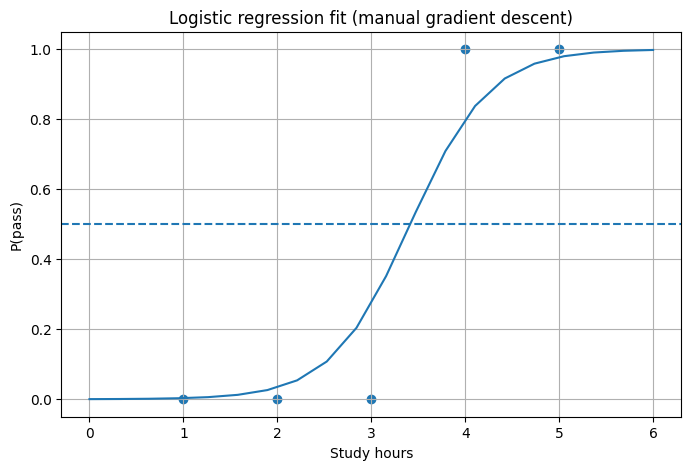

In [ ]:
decision_boundary = -b0 / b1
print("Decision boundary x =", decision_boundary)
print("Final cost =", history[-1][3])

# Plot data and learned probability curve
X_plot = np.linspace(0, 6, 20)
y_plot = sigmoid(b0 + b1 * X_plot)
plt.figure(figsize=(8,5))
plt.scatter(X, y)
plt.plot(X_plot, y_plot)
plt.axhline(0.5, linestyle='--')
plt.title("Logistic regression fit (manual gradient descent)")
plt.xlabel("Study hours")
plt.ylabel("P(pass)")
plt.grid(True)
plt.show()
